# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SEIR_viral_load import *

# Reductions in R

What would be the impact on R0 of testing:
- every 5 days
- with an antigen test of LOD: 10^6
- no delay in results
- with perfect sample collection
- with perfect participation from the community
- starting from an R0 of 2.5
- assuming logproportional infectiousness and 65% behaviorally asymptomatic


In [2]:
L = 6
D = 5
dt = 0
se = 1
participation = 1
R0 = 2.5

f = get_R_reduction_factor(D,L,logproportional,asymptomatic=0.65,dt=0,se=1)
R = R0*(f*participation + 1 - participation)

print('Estimate: R reduced from {:.2f} to {:.2f}'.format(R0,R))

Estimate: R reduced from 2.50 to 0.91


What would be the impact on R0 of testing, same as above except:
- with imperfect sample collection: sensitivity 0.9
- with imperfect participation from the community: participation rate: 25%

In [3]:
L = 6
D = 5
dt = 0
se = 0.9
participation = 0.25
R0 = 2.5

f = get_R_reduction_factor(D,L,logproportional,asymptomatic=0.65,dt=0,se=1)
R = R0*(f*participation + 1 - participation)

print('Estimate: R reduced from {:.2f} to {:.2f}'.format(R0,R))

Estimate: R reduced from 2.50 to 2.11


What would be the impact on R0 of testing, same as above except we used PCR instead?:

In [4]:
L = 3
D = 5
dt = 0
se = 0.9
participation = 0.25
R0 = 2.5

f = get_R_reduction_factor(D,L,logproportional,asymptomatic=0.65,dt=0,se=1)
R = R0*(f*participation + 1 - participation)

print('Estimate: R reduced from {:.2f} to {:.2f}'.format(R0,R))

Estimate: R reduced from 2.50 to 2.03


In [15]:
L = 6
D = 7
dt = 0
se = 0.9
participation = 0.5
R0 = 1.2

f = get_R_reduction_factor(D,L,logproportional,asymptomatic=0.65,dt=0,se=1)
R = R0*(f*participation + 1 - participation)

print('Estimate: R reduced from {:.2f} to {:.2f}'.format(R0,R))

Estimate: R reduced from 1.20 to 0.90


In [18]:
L = 4
D = 4
dt = 1
se = 0.95
participation = 0.5
R0 = 1.2

f = get_R_reduction_factor(D,L,logproportional,asymptomatic=0.65,dt=0,se=1)
R = R0*(f*participation + 1 - participation)

print('Estimate: R reduced from {:.2f} to {:.2f}'.format(R0,R))

Estimate: R reduced from 1.20 to 0.72


In [17]:
L = 4
D = 8
dt = 1
se = 0.95
participation = 0.85
R0 = 1.2

f = get_R_reduction_factor(D,L,logproportional,asymptomatic=0.65,dt=0,se=1)
R = R0*(f*participation + 1 - participation)

print('Estimate: R reduced from {:.2f} to {:.2f}'.format(R0,R))

Estimate: R reduced from 1.20 to 0.68


# Simulations and Plot from SEIR model with testing

We now consider three scenarios: 
- Baseline (no testing)
- Testing with a weekly PCR and 2-day turnaround
- Testing with a weekly LAMP and 0-day turnaround

Baseline: 
- 180 days
- N=10000
- No initial infections
- External rate of 1/N per day
- No testing
- R0 = 2.5

In [5]:
np.random.seed(4)
N=10000
external_rate=1/N
infectiousness_function=logproportional
D=50
L=20
R0=2.5
asymp = 0.65
no_surveillance = SEIRsimulation(
    N,
    external_rate,
    D,
    L,
    infectiousness_function,
    asymptomatic=asymp,
    results_delay=0,
    R0=R0,
    cutoff=6,
    I_init=0,
    tmax=180)

Weekly PCR with 2-day turnaround; otherwise like Baseline.

In [6]:
D=7
L=3
dt=2

np.random.seed(4)
N=10000
external_rate=1/N
infectiousness_function=logproportional
R0=2.5
asymp = 0.65
weekly_pcr = SEIRsimulation(
    N,
    external_rate,
    D,
    L,
    infectiousness_function,
    asymptomatic=asymp,
    results_delay=dt,
    R0=R0,
    cutoff=6,
    I_init=0,
    tmax=180)

Weekly LAMP with 0-day turnaround; otherwise like Baseline.

In [7]:
D=7
L=5
dt=0

np.random.seed(4)
N=10000
external_rate=1/N
infectiousness_function=logproportional
R0=2.5
asymp = 0.65
weekly_lamp = SEIRsimulation(
    N,
    external_rate,
    D,
    L,
    infectiousness_function,
    asymptomatic=asymp,
    results_delay=dt,
    R0=R0,
    cutoff=6,
    I_init=0,
    tmax=180)

In [8]:
D=8
L=4
dt=1

np.random.seed(4)
N=10000
external_rate=1/N
infectiousness_function=logproportional
R0=2.5
asymp = 0.65
swab_pooling = SEIRsimulation(
    N,
    external_rate,
    D,
    L,
    infectiousness_function,
    asymptomatic=asymp,
    results_delay=dt,
    R0=R0,
    cutoff=4,
    I_init=0,
    tmax=180)

In [ ]:
D=7
L=6
dt=0

np.random.seed(4)
N=10000
external_rate=1/N
infectiousness_function=logproportional
R0=2.5
asymp = 0.65
ag_screening = SEIRsimulation(
    N,
    external_rate,
    D,
    L,
    infectiousness_function,
    asymptomatic=asymp,
    results_delay=dt,
    R0=R0,
    cutoff=4,
    I_init=0,
    tmax=180)

Define a helper function to plot the simulations

In [9]:
def plot_simulation(ax,sim):
    St,It,Rt,Qt,SQt,external,internal = sim
    t = np.arange(len(It))
    ax.plot(t,It,
            label='people infected',
           lw=2)
    ax.plot(t,Qt,
            label='people in test-based isolation',
           lw=2)
    ax.plot(t,SQt,
            label='people in symptom-based isolation',
           lw=2)
    ax.set_xlim([0,len(It)])
    ax.set_xlabel('Day',fontsize=14)
    ax.set_ylabel('Count',fontsize=14)
    ax.set_ylim(bottom=0)
    yl = ax.get_ylim()
    ax.legend(loc='upper right',frameon=False,fontsize=12)

Baseline

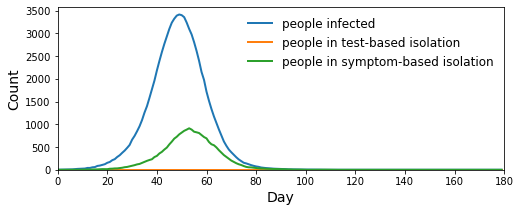

In [10]:
fig,ax = plt.subplots(1,1,figsize=(8,3))
plot_simulation(ax,no_surveillance)

Weekly PCR with 2-day turnaround

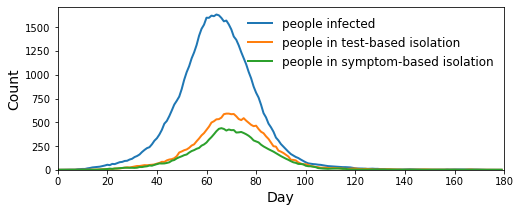

In [11]:
fig,ax = plt.subplots(1,1,figsize=(8,3))
plot_simulation(ax,weekly_pcr)

Weekly LAMP with 0-day turnaround

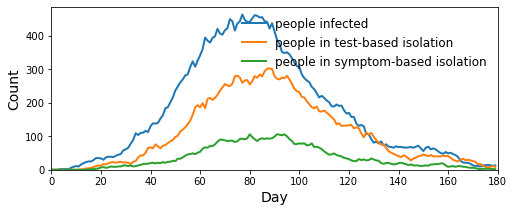

In [12]:
fig,ax = plt.subplots(1,1,figsize=(8,3))
plot_simulation(ax,weekly_lamp)

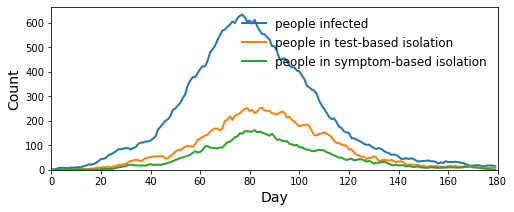

In [13]:
fig,ax = plt.subplots(1,1,figsize=(8,3))
plot_simulation(ax,swab_pooling)